In [2]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cf

# Load dictionary which containes all 19 year trends
TrendDictionary = pd.read_pickle(r'/home/disk/pna2/aodhan/ts_trends.pickle')

In [11]:
for model in TrendDictionary.keys():
    if (len(TrendDictionary[model].keys())) > 11:
        print('Model Name: ', model, '\nN ensembles: ', len(TrendDictionary[model].keys())-1)
        lat_array = TrendDictionary[model]['grid']['lat']
        lon_array = TrendDictionary[model]['grid']['lon']

        EnsembleTrendsArray = []
        for ensemble_name in TrendDictionary[model].keys():
            if ensemble_name == 'grid':
                continue
            ensemble_member = TrendDictionary[model][ensemble_name]
            # return the timeperiods and trend maps in ensemble_member dictionary
            result = ensemble_member.items()
            data = np.array(list(result))
            timeperiods = data[:,0] # not sure if I will need this
            trend_maps = data[:,1] # these are the indivisual 19 year trend maps 
            trend_maps = [np.array(trend_maps[i]) for i in range(0, len(trend_maps))]
            EnsembleTrendsArray.append(trend_maps)
        EnsembleTrendsArray = np.array(EnsembleTrendsArray)
        ForcedTrend = np.nanmean(EnsembleTrendsArray, axis=0)
        NaturalTrendsArray = EnsembleTrendsArray - ForcedTrend

        

        break

Model Name:  ACCESS-ESM1-5 
N ensembles:  40


/home/disk/p/aodhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


(40, 30, 145, 192)


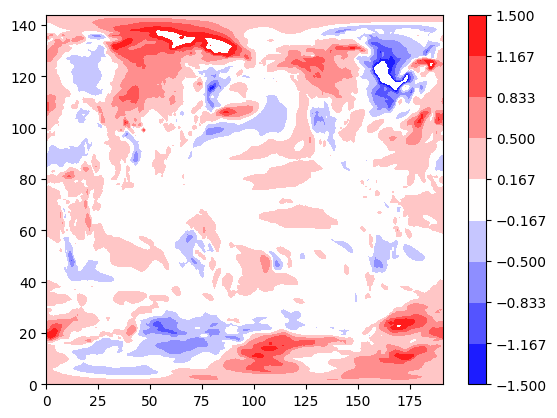

In [19]:
print(np.shape(NaturalTrendsArray))
levels = np.linspace(-1.5,1.5,10)
plt.contourf(NaturalTrendsArray[20,10], cmap='bwr', levels=levels)
plt.colorbar()
